# Assignment 3: Linear Regression

Only use the already imported library `numpy` and the Python standard library. Make sure that the datasets `dataLinReg2D.txt`, `dataQuadReg2D.txt`, `dataQuadReg2D_noisy.txt` and `airfoil_self_noise.dat` are in the same directory as the notebook.

List your team members (name and immatriculation number) and indicate whether you are a B.Sc. Data Science or other group in the following cell:

- *Your names here*

## Task 1: Ridge Regression for Polynomial 2D Functions

Each line in the data sets consists of a data entry `(x,y)` with a 2D point `x` and a 1D function output `y`.

In [1]:
# Load required packages and datasets. Do not modify.
import numpy as np


def load_dataset(path):
    data = np.loadtxt(path)
    X, y = data[:, :2], data[:, 2]
    
    return X, y
    

X_lin, y_lin = load_dataset("dataLinReg2D.txt")
X_quad, y_quad = load_dataset("dataQuadReg2D.txt")
X_noise, y_noise = load_dataset("dataQuadReg2D_noisy.txt")

1) Extend the `make_features` method to also compute quadratic features (`ftype = 'quad'`). You may also experiment with other feature transformations, e.g. third-order polynomials.

In [2]:
def make_features(X, ftype='lin'):
    n, d = X.shape
    
    if ftype == 'lin': # Linear feature transformation (including intercept)
        Phi = np.empty((n, d+1))
        Phi[:, 0] = 1
        Phi[:, 1:] = X
        
    elif ftype == 'quad':  # Quadratic feature transformation
        # Implement for task 1.1.
        Phi = np.empty((n, 2*d+1))
        Phi[:, 0] = 1
        Phi[:, 1:1+d] = X
        Phi[:, 1+d:] = X*X
        
    
    elif ftype == 'nasa':
        # Implement for task 2.2.
        
        # frequency
        f = X[:, 0].reshape(-1, 1)
        # angle of attack
        alpha = np.pi/180.0 * X[:, 1].reshape(-1, 1)
        # chord length
        l = X[:, 2].reshape(-1, 1)
        # free-stream velocity
        v = X[:, 3].reshape(-1, 1)
        # suction side displacement thickness
        t = X[:, 4].reshape(-1, 1)
        
        Phi = np.hstack((
            np.ones((n,1)),
            f,
            l,
            v,
            t,
            np.cos(alpha),
            np.sin(alpha),
            np.tanh(alpha),
            f*f,
            f*l,
            f*alpha,
            f*v,
            f*t,
            l*l,
            l*v,
            v*v,
            v*alpha,
            v*t,
            t*t,
            f*f*l,
            f*f*t,
            v*v*f,
            l*l*f,
            t*t*f,
            l*t*f,
            np.exp(t),
            np.exp(l),
            np.exp(alpha),
            np.log(f),
            np.log(l),
            np.log(t)
        ))
    
    else:
        raise Exception('Feature type {} not implemented yet'.format(ftype))
    
    return Phi

2) Implement Ridge Regression to fit a polynomial function to the data sets with the regularization parameter `lambda_` and feature type `ftype`.

Fill out the methods in `RidgeRegression` to train (`fit`) and predict (`predict`). Feel free to introduce new fields and methods based on your needs, but the methods `fit` and `predict` are required and their interface should not be changed. You need to store the vector of regression coefficients in the field `self.beta`.

In [3]:
# Implement your solution here.
class RidgeRegression(object):
    def __init__(self, lambda_, ftype = 'lin'):
        self.lambda_ = lambda_
        self.ftype = ftype
        self.beta = None  # Learned regression coefficients.
    
    def fit(self, X, y):
        """
        X is an array of shape (n, d), 
            where n is the number of samples and d is the number of features.
        y is an array of shape (n,)
        """
        
        # Implement your solution here.
        Phi = make_features(X, self.ftype)
        k = Phi.shape[1]
        I = np.eye(k)
        I[0, 0] = 0
        
        self.beta = np.linalg.inv((Phi.T @ Phi) + (self.lambda_ * I)) @ Phi.T @ y
    
    def predict(self, X):
        """
        X is an array with shape (n, d).
        The method returns an array of shape (n,).
        """
        Phi = make_features(X, self.ftype)
        
        # Implement your solution here.
        return Phi.dot(self.beta)
    

3) Implement the function `MSE` to compute the mean squared error. `y_pred` and `y_true` are the vectors of predicted and true function outputs respectively with shape `(n,)`, where `n` is the number of samples. The function returns a single float.

In [4]:
def MSE(y_pred, y_true):
    # Implement your solution here.
    diff = y_pred - y_true
    return np.dot(diff, diff)/y_true.size

4) Evaluate your Ridge Regression model with linear features on the linear `(X_lin, y_lin)` data set. Try to find a good `lambda_`. How does it perform with quadratic features on this data set? Report the MSE on the full data set when trained on the full data set. (Ideally, repeat this for different Ridge regularization parameters `lambda_` and generate a nice bar plot of the MSE for various `lambda_`.)

Lambda: 1e-05


<IPython.core.display.Javascript object>


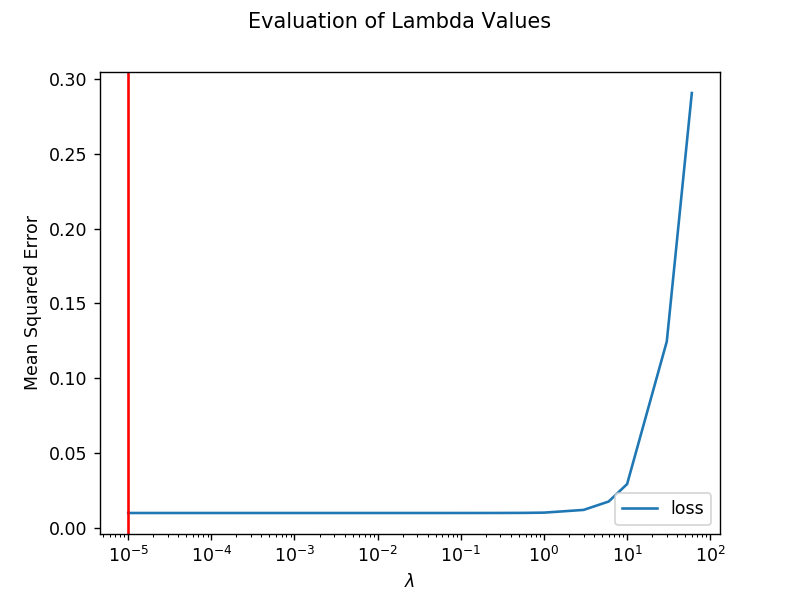

MSE ( lin ): 0.010247981453724932


<IPython.core.display.Javascript object>


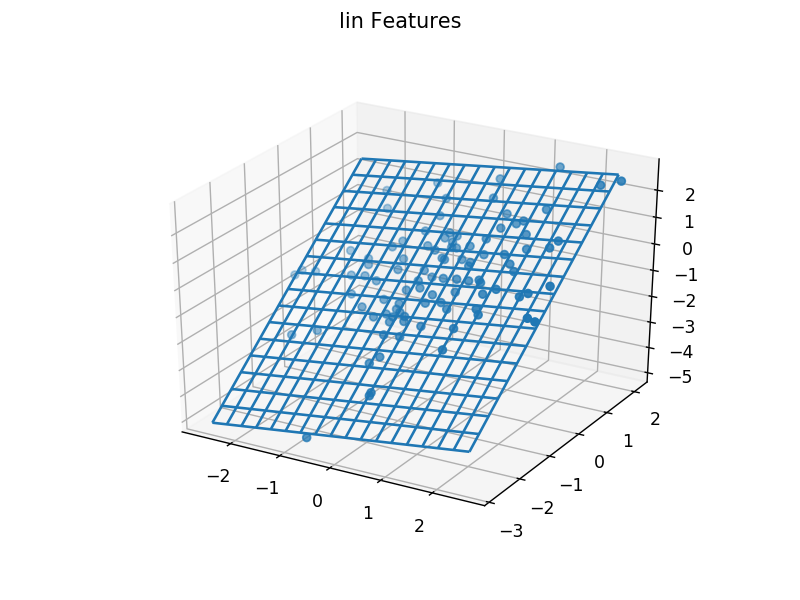

MSE ( quad ): 0.009873605632931054


<IPython.core.display.Javascript object>


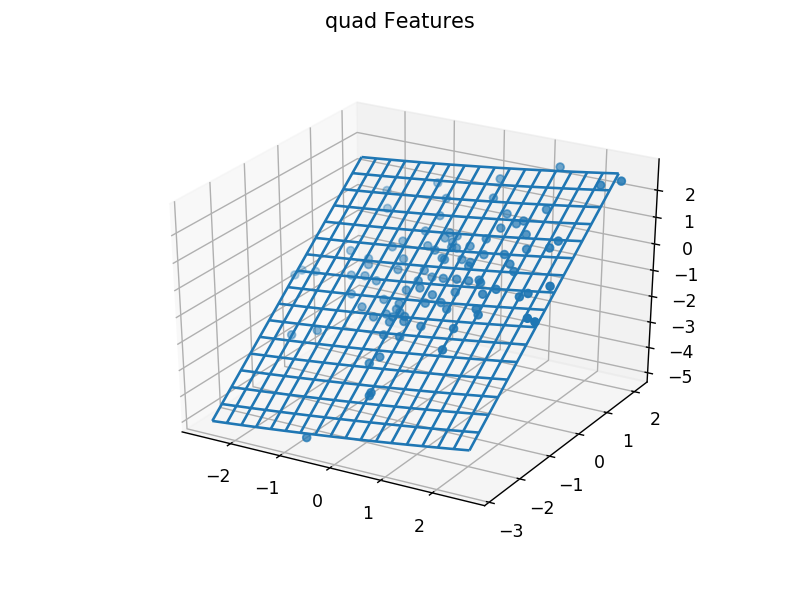

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
%matplotlib notebook

def train_evaluate(regression_model, X, y):
    regression_model.fit(X, y)
    yhat = regression_model.predict(X)
    print('MSE (', regression_model.ftype, '):', MSE(yhat, y))

    
def plot_data_and_model(regression_model, X, y):
    
    fig = plt.figure()
    plt.suptitle(regression_model.ftype + ' Features')
    ax = fig.add_subplot(111, projection = '3d')
    ax.scatter(X[:, 0], X[:, 1], y, marker = 'o')
    
    xmin = X.min(0)
    xmax = X.max(0)

    x0grid, x1grid = np.mgrid[xmin[0]:xmax[0]:.3, xmin[1]:xmax[1]:.3]

    xdim0, xdim1 = np.shape(x0grid)
    xsize = np.size(x0grid)

    x0hat = x0grid.flatten()
    x1hat = x1grid.flatten()
    x0hat = x0hat.reshape((np.size(x0hat), 1))
    x1hat = x1hat.reshape((np.size(x1hat), 1))
    xhat = np.append(x0hat, x1hat, 1)
    xhatfv = make_features(xhat, regression_model.ftype)
    yhat = xhatfv.dot(regression_model.beta)
    ygrid = yhat.reshape((xdim0, xdim1))
    ax.plot_wireframe(x0grid, x1grid, ygrid)
    ax.auto_scale_xyz([xmin[0], xmax[0]], [xmin[1], xmax[1]], [y.min(), y.max()])
    fig.show()


# Implement your solution here.
lambdas = np.outer(10. ** np.arange(-5, 2), [1, 3, 6]).ravel()
loss = np.zeros(lambdas.size)
for i in range(lambdas.size):
    regression_lin = RidgeRegression(lambda_=lambdas[i], ftype='lin')
    regression_lin.fit(X_lin, y_lin)
    yhat = regression_lin.predict(X_lin)
    loss[i] = MSE(yhat, y_lin)
li = loss.argmin()
print('Lambda:', lambdas[li])

plt.figure()
plt.semilogx(lambdas, loss, label='loss')
plt.axvline(lambdas[li], color='r')
plt.suptitle('Evaluation of Lambda Values')
plt.xlabel('$\lambda$')
plt.ylabel('Mean Squared Error')
plt.legend(loc=4)

# use best lambda
regression_lin = RidgeRegression(lambda_=lambdas[li], ftype='lin')
train_evaluate(regression_lin, X_lin, y_lin)

# If the plot doesn't show the first time, run this cell again
plot_data_and_model(regression_lin, X_lin, y_lin)

# use best lambda with quadratic features
regression_lin = RidgeRegression(lambda_=lambdas[li], ftype='quad')
train_evaluate(regression_lin, X_lin, y_lin)

plot_data_and_model(regression_lin, X_lin, y_lin)

Since the data points are without noise and all the data points are used for training and testing, the predicted function doesn't need any regularization which is why the lowest `lambda_` value is the best.

5) Try to find a good model (including features and suitable `lambda_` parameters) for the quadratic data set `(X_quad, y_quad)`. Report the MSE on the full data set when trained on the full data set.  (Ideally, repeat this for different Ridge regularization parameters `lambda_` and generate a nice bar plot of the MSE for various `lambda_`.) Also plot your predicted model using the method above `plot_data_and_model`.

Lambda: 1e-05


<IPython.core.display.Javascript object>


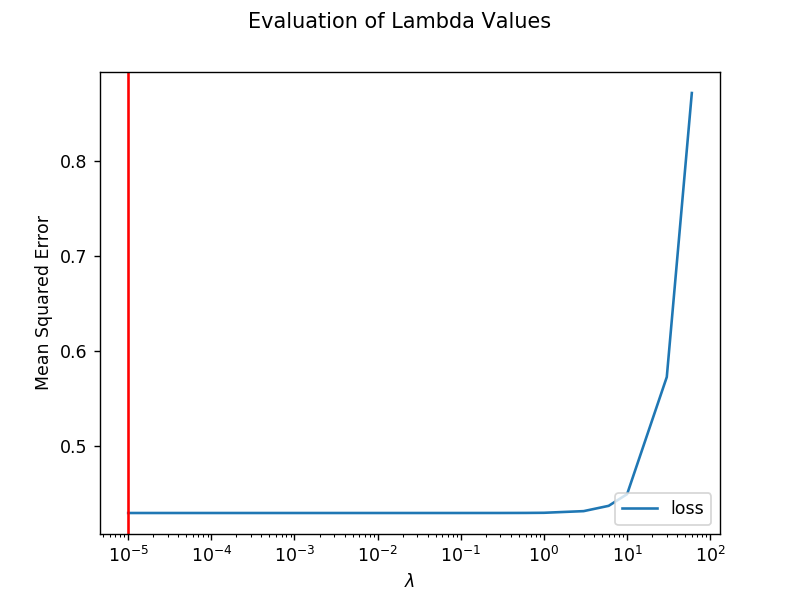

MSE ( quad ): 0.4295248452676575


<IPython.core.display.Javascript object>


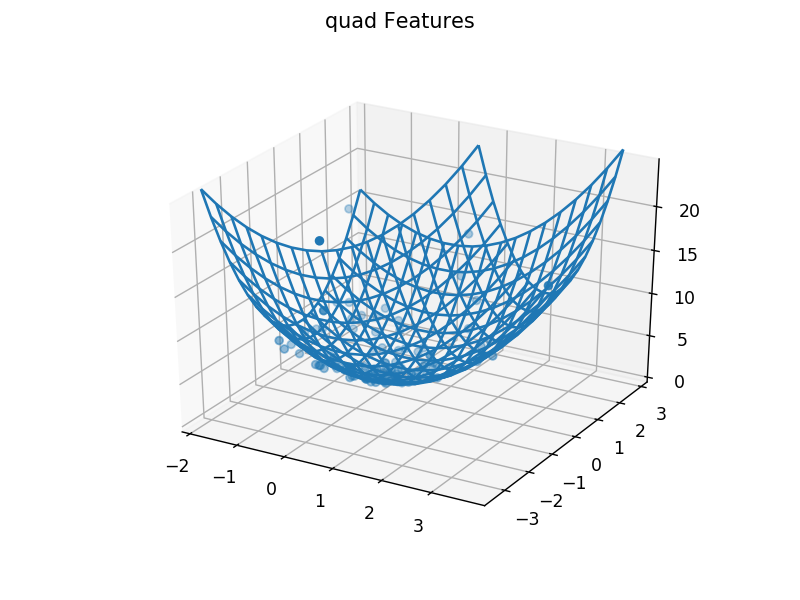

In [7]:
# Implement your model tests here using the quadratic data set
for i in range(lambdas.size):
    regression_quad = RidgeRegression(lambda_=lambdas[i], ftype='quad')
    regression_quad.fit(X_quad, y_quad)
    yhat = regression_quad.predict(X_quad)
    loss[i] = MSE(yhat, y_quad)
li = loss.argmin()
print('Lambda:', lambdas[li])

plt.figure()
plt.semilogx(lambdas, loss, label='loss')
plt.axvline(lambdas[li], color='r')
plt.suptitle('Evaluation of Lambda Values')
plt.xlabel('$\lambda$')
plt.ylabel('Mean Squared Error')
plt.legend(loc=4)

# use best lambda
regression_quad = RidgeRegression(lambda_=lambdas[li], ftype='quad')
train_evaluate(regression_quad, X_quad, y_quad)

# If the plot doesn't show the first time, run this cell again
plot_data_and_model(regression_quad, X_quad, y_quad)

Since the data points are without noise and all the data points are used for training and testing, the predicted function doesn't need any regularization which is why the lowest `lambda_` value is the best.

6) Try to find a good model (including features and suitable `lambda_` parameters) for the noisy data set `(X_noise, y_noise)`. Report the MSE on the full data set when trained on the full data set.  (Ideally, repeat this for different Ridge regularization parameters `lambda_` and generate a nice bar plot of the MSE for various `lambda_`.) Also plot your predicted model using the method above `plot_data_and_model`.

Lambda: 1e-05


<IPython.core.display.Javascript object>


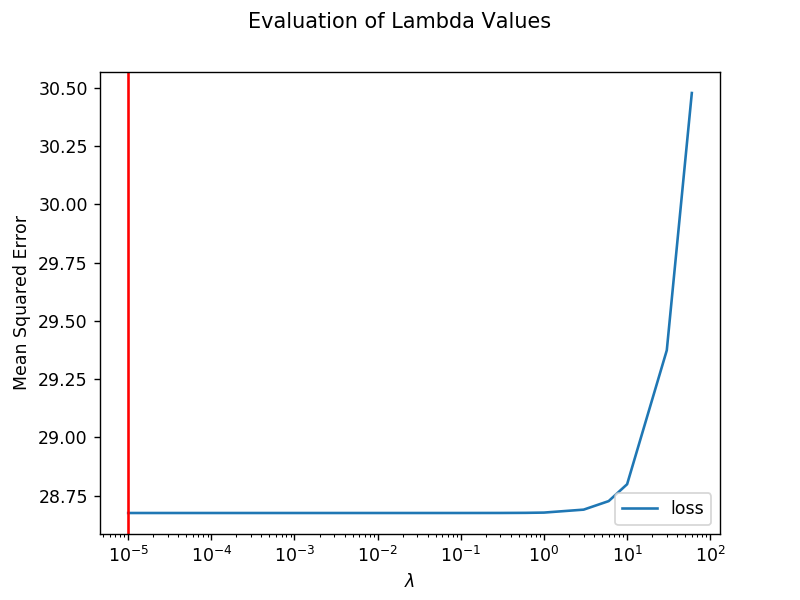

MSE ( quad ): 28.676174309208037


<IPython.core.display.Javascript object>


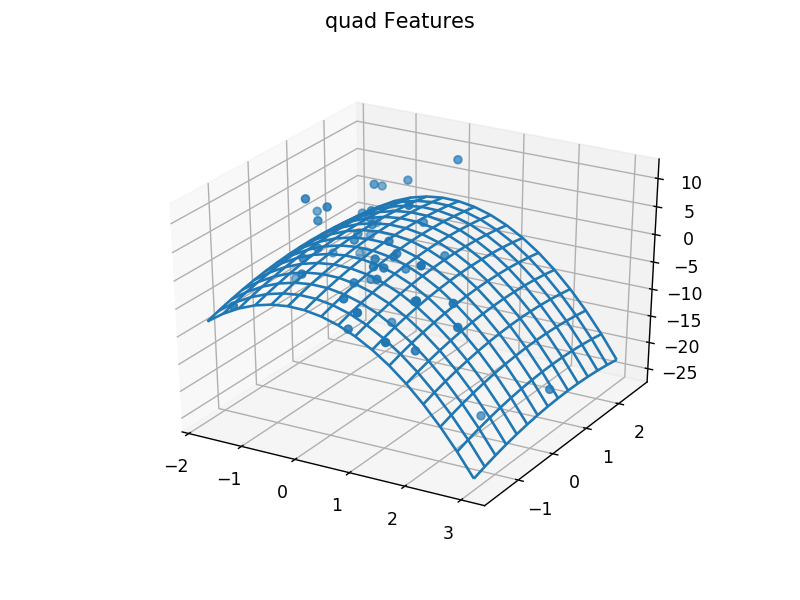

In [8]:
# Implement your model tests here using the noisy data set
for i in range(lambdas.size):
    regression_noise = RidgeRegression(lambda_=lambdas[i], ftype='quad')
    regression_noise.fit(X_noise, y_noise)
    yhat = regression_noise.predict(X_noise)
    loss[i] = MSE(yhat, y_noise)
li = loss.argmin()
print('Lambda:', lambdas[li])

plt.figure()
plt.semilogx(lambdas, loss, label='loss')
plt.axvline(lambdas[li], color='r')
plt.suptitle('Evaluation of Lambda Values')
plt.xlabel('$\lambda$')
plt.ylabel('Mean Squared Error')
plt.legend(loc=4)

# use best lambda
regression_noise = RidgeRegression(lambda_=lambdas[li], ftype='quad')
train_evaluate(regression_noise, X_noise, y_noise)

# If the plot doesn't show the first time, run this cell again
plot_data_and_model(regression_noise, X_noise, y_noise)

Since all the data points are used for training and testing, the predicted function doesn't need any regularization which is why the lowest `lambda_` value is the best.

## Task 2: Airfoil Self-Noise Prediction

The air self-noise dataset is a [dataset by NASA](https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise). Your task is to find a good feature mapping for ridge regression to achieve the lowest possible prediction error.

1) Explain the content of the dataset in few words. What are the input features? What is the output?

NASA data set, obtained from a series of aerodynamic and acoustic tests of two and three-dimensional airfoil blade sections conducted in an anechoic wind tunnel. The NASA data set comprises different size NACA 0012 airfoils at various wind tunnel speeds and angles of attack. The span of the airfoil and the observer position were the same in all of the experiments.

This problem has the following inputs:
1. Frequency, in Hertzs.
2. Angle of attack, in degrees.
3. Chord length, in meters.
4. Free-stream velocity, in meters per second.
5. Suction side displacement thickness, in meters.

The only output is:
6. Scaled sound pressure level, in decibels. 

In [9]:
def load_dataset(path):
    data = np.genfromtxt(path)
    X, y = data[:, :5], data[:, 5]
    
    return X, y
    

X, y = load_dataset('airfoil_self_noise.csv')

2) Implement the option `ftype = 'nasa'` in the `make_features` function. You should try any type of non-linear features and interactions between features. You are not restricted to the feature mapping presented in the lecture. It is helpful to think about the domain and characteristics of the features, e.g. how do you work with periodic features.

Explain the choice of your features:

We relied mostly on polynomial features as they seem to give the best result. Important are of course the constant and the linear features as a basis. Since the angle is given in degree, we used this input feature with some trigonometric functions (cos, sin, tanh). We added some of the quadratic features, as long as they improved our results. In the end, we also added some exponential/logarithmic functions to span a broader space of possible functions to predict. There are lots of approaches you can use to estimate good features, e.g. you can have a look at physical models/equations or the correlation of the input features to find these kind of features.

3) Evaluate your Ridge Regression model with your chosen features on the data set. Try to find a good `lambda_`. Report the MSE on the full data set when trained on the full data set. (Ideally, repeat this for different Ridge regularization parameters `lambda_` and generate a nice bar plot of the MSE for various `lambda_`.)

Lambda: 6e-06


<IPython.core.display.Javascript object>


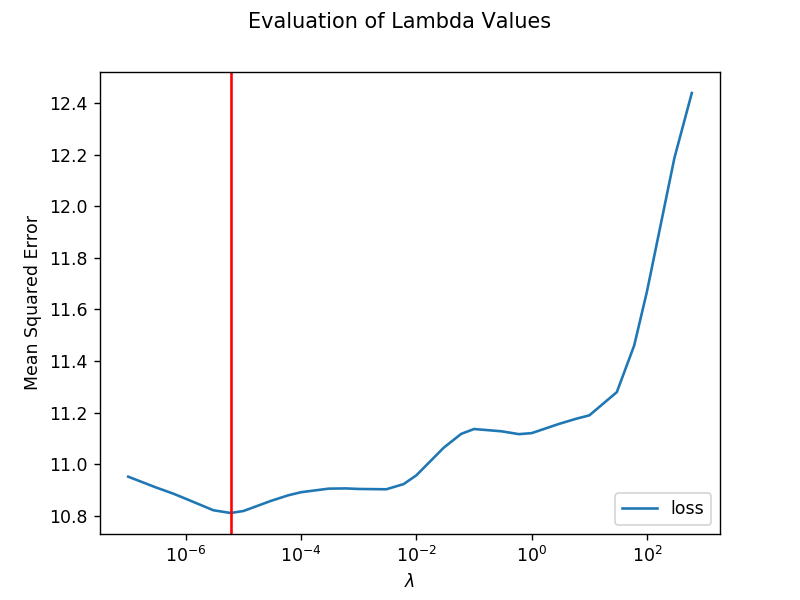

10.811367130747067

In [10]:
def train_evaluate(regression_model, X, y):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020)
    
    regression_model.fit(X_train, y_train)
    yhat_test = regression_model.predict(X_test)
    #print('MSE:', MSE(yhat_test, y_test))
    return MSE(yhat_test, y_test)

lambdas = np.outer(10. ** np.arange(-7, 3), [1, 3, 6]).ravel()
loss = np.zeros(lambdas.size)
for i in range(lambdas.size):
    your_regression = RidgeRegression(lambda_=lambdas[i], ftype='nasa')
    loss[i] = train_evaluate(your_regression, X, y)
li = loss.argmin()
print('Lambda:', lambdas[li])

plt.figure()
plt.semilogx(lambdas, loss, label='loss')
plt.axvline(lambdas[li], color='r')
plt.suptitle('Evaluation of Lambda Values')
plt.xlabel('$\lambda$')
plt.ylabel('Mean Squared Error')
plt.legend(loc=4)


your_regression = RidgeRegression(lambda_=lambdas[li], ftype='nasa')
train_evaluate(your_regression, X, y)

The data consists of very different kind of input features and real data is often noisy. Therefore, finding the correct feature representation of the underlying function is hard (especially without further knowledge of the dependencies between the input features). Getting a very low MSE depends on the choice of features and the regularization parameter. Sometimes having a look at the mean and the standard deviation can also give a hint at how low the MSE can actually get. Normalization techniques can further influence the MSE and choice of features.

We have one fixed data set for training and another one for testing.

**For all students other than B.Sc. Data Science:**

4) Implement the function `cross_validation` to evaluate the prediction error of your model. Report the mean squared error from cross-validation. (Ideally, repeat this for different Ridge regularization parameters `lambda_` and generate a nice bar plot of the MSE for various `lambda_`.)

Lambda: 1e-06


<IPython.core.display.Javascript object>


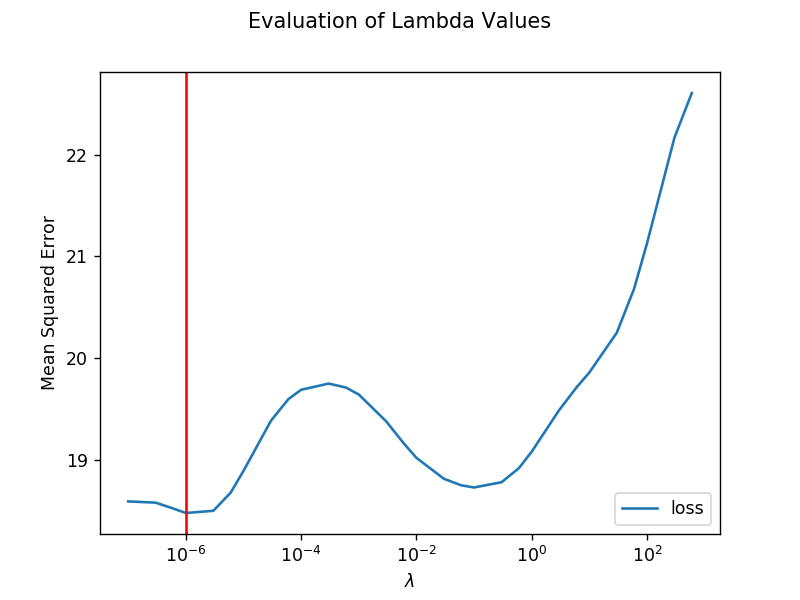

Loss: 18.48140257782061


In [12]:
def cross_validation(regression_model, X, y):
    n, d = X.shape
    k_folds = 10
    boundaries = np.linspace(0, n, k_folds+1)[1:]
    nind = np.array([ sum(i > boundaries) for i in range(n) ])
    bind = np.equal.outer(range(k_folds), nind)
    
    loss_cv = np.empty(k_folds)
    for i in range(k_folds):
        X_train, y_train = X[~bind[i]], y[~bind[i]]
        X_test, y_test = X[bind[i]], y[bind[i]]

        regression_model.fit(X_train, y_train)
        yhat_test = regression_model.predict(X_test)
        loss_cv[i] = MSE(yhat_test, y_test)
    
    return loss_cv.mean()

lambdas = np.outer(10. ** np.arange(-7, 3), [1, 3, 6]).ravel()
loss = np.zeros(lambdas.size)
for i in range(lambdas.size):
    your_regression = RidgeRegression(lambda_=lambdas[i], ftype='nasa')
    loss[i] = cross_validation(your_regression, X, y)
li = loss.argmin()
print('Lambda:', lambdas[li])

plt.figure()
plt.semilogx(lambdas, loss, label='loss')
plt.axvline(lambdas[li], color='r')
plt.suptitle('Evaluation of Lambda Values')
plt.xlabel('$\lambda$')
plt.ylabel('Mean Squared Error')
plt.legend(loc=4)


your_regression = RidgeRegression(lambda_=lambdas[li], ftype='nasa')
print('Loss:', loss[li])

Due to cross-validation, we have a higher MSE since basically all data points are used with one set left out (validation dat set) and the overall performance depends on the mean of these validation data sets. It partially resembles the results from the previous experiment.